#NAME: JAWAD HASSAN
#ROLL NUMBER: 2230-0035
#PROJECT: DIABETES PREDICTION SYSTEM
#SECTION: BS AI

In [1]:
#IMPORT LIBRARIES
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#STUDY NATURE
df=pd.read_csv('/content/diabetes.csv')
# Shape of the dataset
print("Dataset Shape (rows, columns):")
print(df.shape)
print("-" * 50)

# Dataset information
print("Dataset Information (df.info()):")
df.info()
print("-" * 50)

# First 5 rows of the dataset
print("First 5 Rows of the Dataset (df.head()):")
print(df.head())
print("-" * 50)
print(df['Outcome'].value_counts())

#  Statistical Summary of the Dataset using df.describe()
print("Statistical Summary of the Dataset (df.describe()):")
print(df.describe())
print("\n" + "-"*60 + "\n")

# Zero Value Count in Each Column using (df == 0).sum()
print("Count of Zero Values in Each Column ((df == 0).sum()):")
print((df == 0).sum())


Dataset Shape (rows, columns):
(768, 9)
--------------------------------------------------
Dataset Information (df.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
--------------------------------------------------
First 5 Rows of the Dataset (df.head()):
   Pregnancies  Glucose 

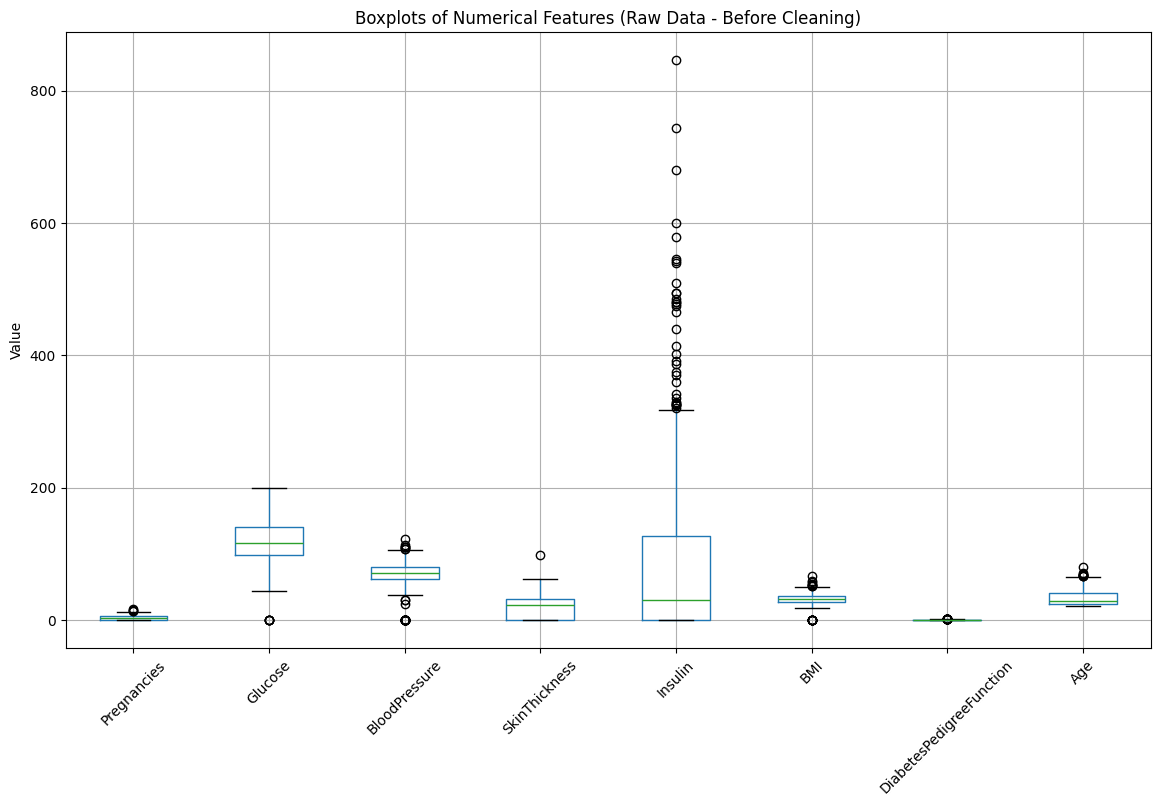

In [3]:
# Boxplots of Numerical Features (Before Cleaning)
plt.figure(figsize=(14, 8))
df.drop(columns=["Outcome"]).boxplot()
plt.title("Boxplots of Numerical Features (Raw Data - Before Cleaning)")
plt.ylabel("Value")
plt.xticks(rotation=45)
plt.show()


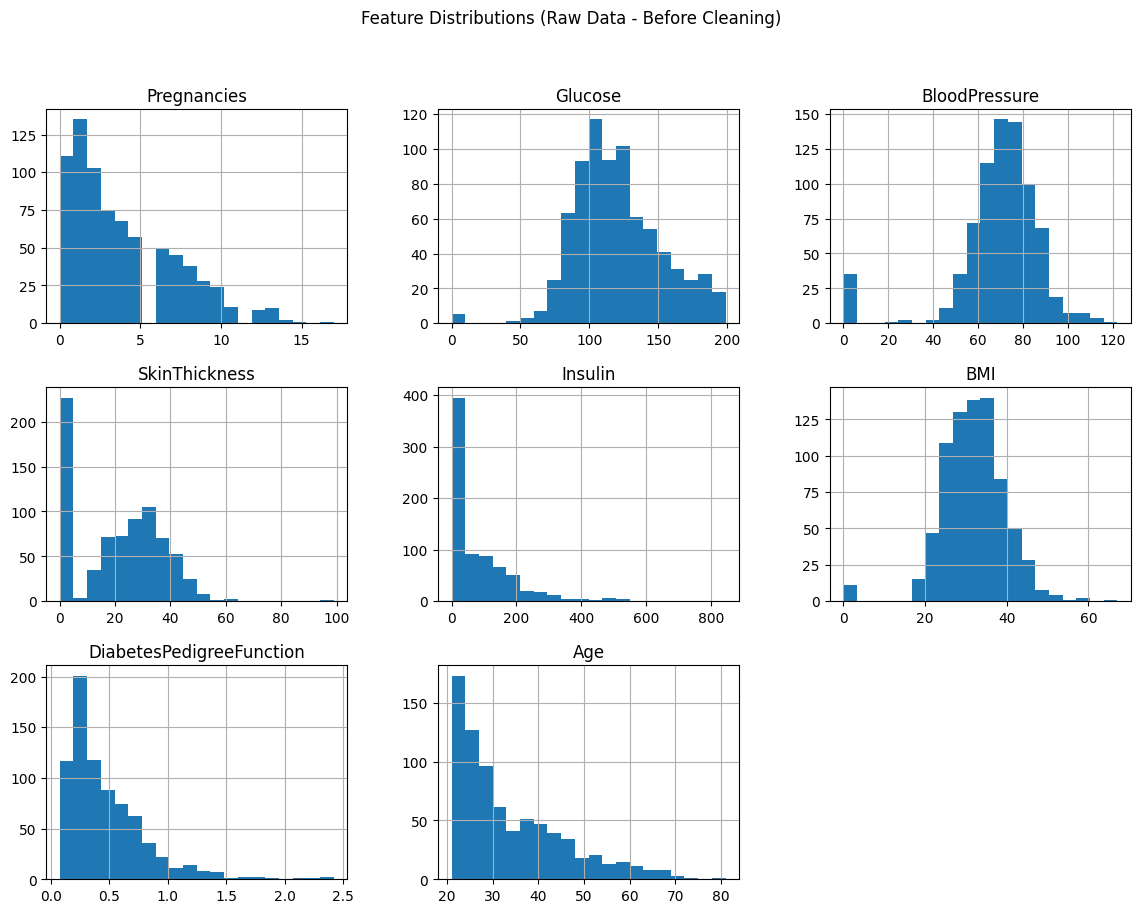

In [4]:
#  Histograms of Numerical Features (Before Cleaning)
df.drop(columns=["Outcome"]).hist(figsize=(14, 10), bins=20)
plt.suptitle("Feature Distributions (Raw Data - Before Cleaning)")
plt.show()


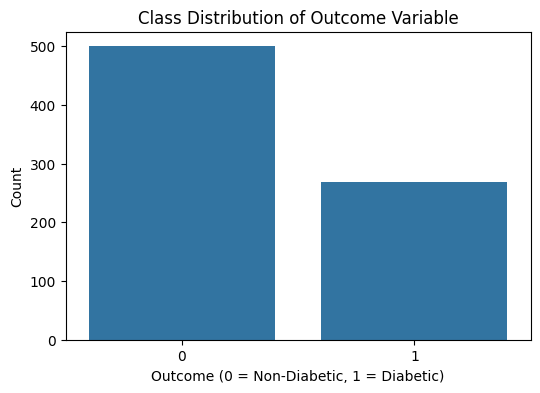

In [5]:
# Outcome Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="Outcome", data=df)
plt.title("Class Distribution of Outcome Variable")
plt.xlabel("Outcome (0 = Non-Diabetic, 1 = Diabetic)")
plt.ylabel("Count")
plt.show()


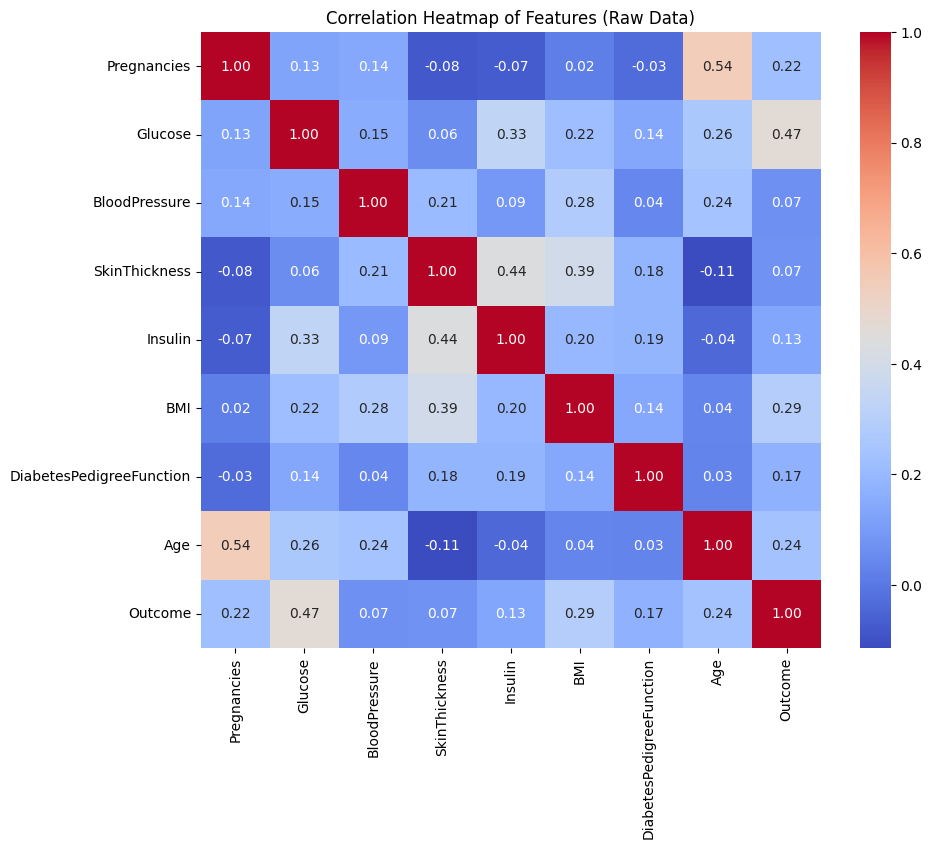

In [6]:
#  Correlation Heatmap (Raw Data)
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Features (Raw Data)")
plt.show()


In [7]:
#Missing Value Analysis & Target-Aware Imputation
print('bp mean:',df['BloodPressure'].mean())
print('bp std:',df['BloodPressure'].std())
df.isnull().sum()
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.nan)
df.isnull().sum()
def median_target(var):
    temp = df[df[var].notnull()]
    temp=temp[[var,'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp
print(median_target('Glucose'))
print(median_target('BloodPressure'))
print(median_target('SkinThickness'))
print(median_target('Insulin'))
print(median_target('BMI'))
df.loc[(df['Outcome'] == 0 ) & (df['Glucose'].isnull()),'Glucose'] = 107
df.loc[(df['Outcome'] == 1 ) & (df['Glucose'].isnull()),'Glucose'] = 140
#Same for Blood Pressure, Skin Thickness, Insulin andBMI:

df.loc[(df['Outcome'] == 0 ) & (df['BloodPressure'].isnull()),'BloodPressure'] = 70
df.loc[(df['Outcome'] == 1 ) & (df['BloodPressure'].isnull()),'BloodPressure'] = 75

df.loc[(df['Outcome'] == 0 ) & (df['SkinThickness'].isnull()),'SkinThickness'] = 27
df.loc[(df['Outcome'] == 1 ) & (df['SkinThickness'].isnull()),'SkinThickness'] = 32

df.loc[(df['Outcome'] == 0 ) & (df['Insulin'].isnull()),'Insulin'] = 103
df.loc[(df['Outcome'] == 1 ) & (df['Insulin'].isnull()),'Insulin'] = 170

df.loc[(df['Outcome'] == 0 ) & (df['BMI'].isnull()),'BMI'] = 30
df.loc[(df['Outcome'] == 1 ) & (df['BMI'].isnull()),'BMI'] = 34

print(df.isnull().sum())


bp mean: 69.10546875
bp std: 19.355807170644777
   Outcome  Glucose
0        0    107.0
1        1    140.0
   Outcome  BloodPressure
0        0           70.0
1        1           74.5
   Outcome  SkinThickness
0        0           27.0
1        1           32.0
   Outcome  Insulin
0        0    102.5
1        1    169.5
   Outcome   BMI
0        0  30.1
1        1  34.3
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [11]:
y = df['Outcome']
df_without_outcome = df.drop("Outcome", axis = 1)
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(df_without_outcome)
pca.get_covariance()
explained_variance = pca.explained_variance_ratio_
explained_variance

array([8.81851514e-01, 7.60751344e-02, 1.86962536e-02, 1.14514642e-02,
       8.55755079e-03, 2.51981491e-03, 8.37002764e-04, 1.12657304e-05])

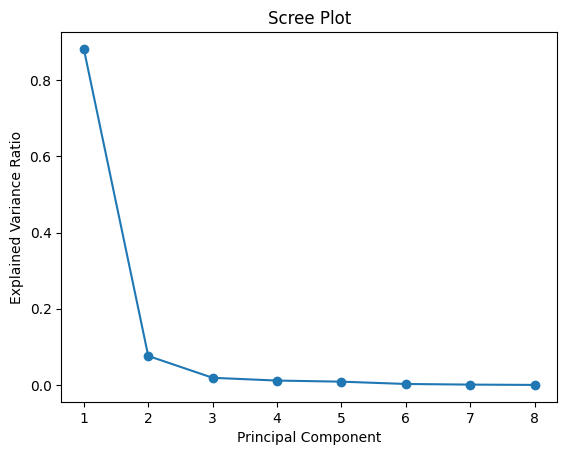

In [35]:
import matplotlib.pyplot as plt

plt.plot(range(1, 9), pca.explained_variance_ratio_, marker='o')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [36]:
loadings = pd.DataFrame(
    pca.components_,  # each row = PC, each column = original feature weights
    columns=df_without_outcome.columns,
    index=[f'PC{i+1}' for i in range(len(df_without_outcome.columns))]
)

# Show contributions for all PCs
print(loadings)

# Optional: just see PC1 contributions
print("\nFeature contributions to PC1:")
print(loadings.loc['PC1'].sort_values(ascending=False))

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
PC1     0.002502  0.180775       0.011428       0.020747  0.982887  0.018864   
PC2     0.019879  0.961859       0.133439       0.058764 -0.183007  0.040146   
PC3     0.105947 -0.202432       0.733597       0.189802  0.010813  0.135091   
PC4     0.112057 -0.002157      -0.430380      -0.395707  0.007165 -0.362420   
PC5     0.047022 -0.033535      -0.496614       0.748417 -0.015550  0.335763   
PC6     0.007807 -0.004916      -0.109447      -0.493262 -0.005642  0.857700   
PC7     0.986659  0.003787      -0.008091      -0.008438  0.000008  0.003053   
PC8     0.006950 -0.000821       0.001863      -0.000465 -0.000290 -0.006222   

     DiabetesPedigreeFunction       Age  
PC1                  0.000552  0.018174  
PC2                  0.000851  0.134420  
PC3                 -0.000346  0.596021  
PC4                 -0.001224  0.717096  
PC5                  0.003465  0.277345  
PC6                  0.0054

In [8]:
df = df[['Insulin','Glucose','BloodPressure','Age','BMI']]
df

,Insulin,Glucose,BloodPressure,Age,BMI
0,170.0,148.0,72.0,50,33.6
1,103.0,85.0,66.0,31,26.6
2,170.0,183.0,64.0,32,23.3
3,94.0,89.0,66.0,21,28.1
4,168.0,137.0,40.0,33,43.1
...,...,...,...,...,...
763,180.0,101.0,76.0,63,32.9
764,103.0,122.0,70.0,27,36.8
765,112.0,121.0,72.0,30,26.2
766,170.0,126.0,60.0,47,30.1


In [9]:
#age
NewAge = pd.Series(["Youngest", "Younger", "Middleaged","Older","Oldest"], dtype = "category")
df["NewAge"] = NewAge
df.loc[df["Age"] <= 30, "NewAge"] = NewAge[0]
df.loc[(df["Age"] > 30) & (df["Age"] <= 40), "NewAge"]=NewAge[1]
df.loc[(df["Age"] > 40) & (df["Age"] <= 50), "NewAge"]=NewAge[2]
df.loc[(df["Age"] > 50) & (df["Age"] <= 60), "NewAge"]=NewAge[3]
df.loc[df["Age"] > 61 ,"NewAge"] = NewAge[4]
#glucose
NewGlucose = pd.Series(["VeryLow", "Low", "Normal","Early","Diabetes"], dtype = "category")
df["NewGlucose"] = NewGlucose
df.loc[df["Glucose"] <= 60, "NewGlucose"] = NewGlucose[0]
df.loc[(df["Glucose"] > 60) & (df["Glucose"] <= 80), "NewGlucose"]=NewGlucose[1]
df.loc[(df["Glucose"] > 80) & (df["Glucose"] <= 140), "NewGlucose"]=NewGlucose[2]
df.loc[(df["Glucose"] > 141) & (df["Glucose"] <= 180), "NewGlucose"]=NewGlucose[3]
df.loc[df["Glucose"] > 180 ,"NewGlucose"] = NewGlucose[4]
#bp
NewBloodPressure = pd.Series(["VeryLow", "Low", "Normal","High","Hypertension"], dtype = "category")
df["NewBloodPressure"] = NewBloodPressure
df.loc[df["BloodPressure"] <= 60, "NewBloodPressure"] = NewBloodPressure[0]
df.loc[(df["BloodPressure"] > 60) & (df["BloodPressure"] <= 75), "NewBloodPressure"] = NewBloodPressure[1]
df.loc[(df["BloodPressure"] > 75) & (df["BloodPressure"] <= 90), "NewBloodPressure"] = NewBloodPressure[2]
df.loc[(df["BloodPressure"] > 90) & (df["BloodPressure"] <= 100), "NewBloodPressure"] = NewBloodPressure[3]
df.loc[df["BloodPressure"] > 100, "NewBloodPressure"] = NewBloodPressure[4]

#bmi
NewBMI = pd.Series(["Starvation", "Normal", "Overweight","Obese","VeryObese"], dtype = "category")
df["NewBMI"] = NewBMI
df.loc[df["BMI"] < 19, "NewBMI"] = NewBMI[0]
df.loc[(df["BMI"] >= 19) & (df["BMI"] < 25), "NewBMI"] = NewBMI[1]
df.loc[(df["BMI"] >= 25) & (df["BMI"] < 31), "NewBMI"] =  NewBMI[2]
df.loc[(df["BMI"] >= 31) & (df["BMI"] < 41), "NewBMI"] =  NewBMI[3]
df.loc[df["BMI"] >= 41, "NewBMI"] =  NewBMI[4]

df.head()

,Insulin,Glucose,BloodPressure,Age,BMI,NewAge,NewGlucose,NewBloodPressure,NewBMI
0,170.0,148.0,72.0,50,33.6,Middleaged,Early,Low,Obese
1,103.0,85.0,66.0,31,26.6,Younger,Normal,Low,Overweight
2,170.0,183.0,64.0,32,23.3,Younger,Diabetes,Low,Normal
3,94.0,89.0,66.0,21,28.1,Youngest,Normal,Low,Overweight
4,168.0,137.0,40.0,33,43.1,Younger,Normal,VeryLow,VeryObese


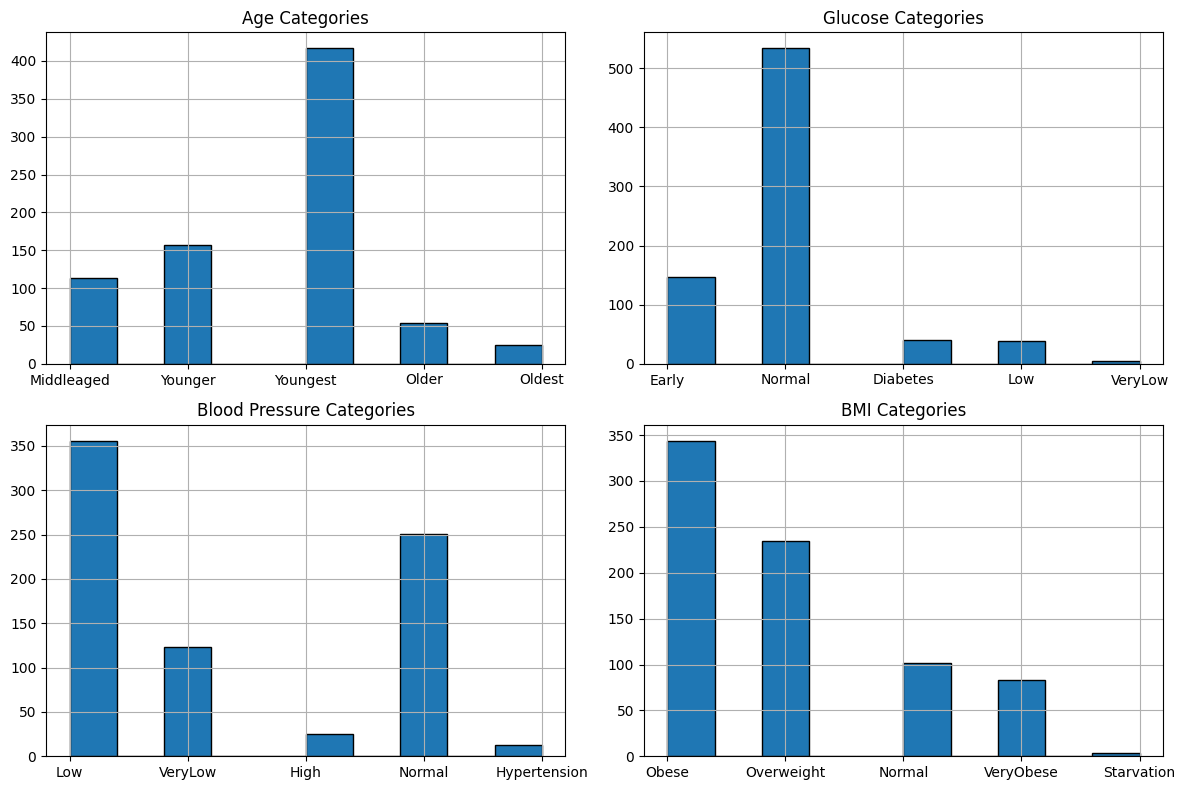

In [10]:

fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2x2 grid of plots

df['NewAge'].hist(ax=axes[0, 0], edgecolor="black")
axes[0, 0].set_title("Age Categories")

df['NewGlucose'].hist(ax=axes[0, 1], edgecolor="black")
axes[0, 1].set_title("Glucose Categories")

df['NewBloodPressure'].hist(ax=axes[1, 0], edgecolor="black")
axes[1, 0].set_title("Blood Pressure Categories")

df['NewBMI'].hist(ax=axes[1, 1], edgecolor="black")
axes[1, 1].set_title("BMI Categories")

plt.tight_layout()
plt.show()

,Insulin,Glucose,BloodPressure,Age,BMI,NewBMI_Obese,NewBMI_Overweight,NewBMI_Starvation,NewBMI_VeryObese,NewGlucose_Early,...,NewGlucose_Normal,NewGlucose_VeryLow,NewAge_Older,NewAge_Oldest,NewAge_Younger,NewAge_Youngest,NewBloodPressure_Hypertension,NewBloodPressure_Low,NewBloodPressure_Normal,NewBloodPressure_VeryLow
0,170.0,148.0,72.0,50,33.6,True,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,103.0,85.0,66.0,31,26.6,False,True,False,False,False,...,True,False,False,False,True,False,False,True,False,False
2,170.0,183.0,64.0,32,23.3,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
3,94.0,89.0,66.0,21,28.1,False,True,False,False,False,...,True,False,False,False,False,True,False,True,False,False
4,168.0,137.0,40.0,33,43.1,False,False,False,True,False,...,True,False,False,False,True,False,False,False,False,True


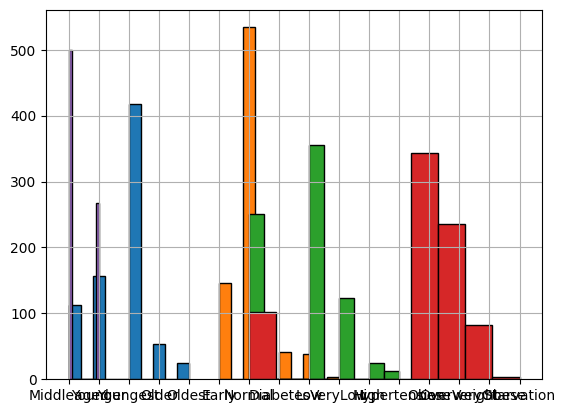

In [40]:
df.head()
df['NewAge'].hist(edgecolor = "black")
df['NewGlucose'].hist(edgecolor = "black")
df['NewBloodPressure'].hist(edgecolor = "black")
df['NewBMI'].hist(edgecolor = "black")
y.hist(edgecolor = "black")
df = pd.get_dummies(df, columns =["NewBMI",
"NewGlucose","NewAge","NewBloodPressure"], drop_first=True)
df.head()

In [41]:
#LOGISTIC WITHOUT SCALING
df = df[['Insulin','Glucose','BloodPressure','Age','BMI']]
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
xtrain,xtest,ytrain,ytest = train_test_split(df,y,test_size=0.15, random_state=0)
model = LogisticRegression()
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
ypred
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print('Model accuracy score: {0:0.4f}'.
format(accuracy_score(ytest, ypred)))
print("Confusion Matrix:\n", confusion_matrix(ytest, ypred))
print("Classification Report:\n", classification_report(ytest, ypred))

Model accuracy score: 0.7931
Confusion Matrix:
 [[68 10]
 [14 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85        78
           1       0.71      0.63      0.67        38

    accuracy                           0.79       116
   macro avg       0.77      0.75      0.76       116
weighted avg       0.79      0.79      0.79       116



In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# --- Make sure Outcome exists ---
if 'Outcome' not in df.columns:
    raise ValueError("The DataFrame does not contain a column named 'Outcome'")

# --- Separate target and features ---
y = df['Outcome']  # target column
X = df[['Insulin','Glucose','BloodPressure','Age','BMI']]  # features

# --- Feature scaling ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Train-test split ---
xtrain, xtest, ytrain, ytest = train_test_split(X_scaled, y, test_size=0.15, random_state=0)

In [15]:
#3MODEL TESTING
models = {
    'Logistic Regression': LogisticRegression(random_state=0),
    'KNN': KNeighborsClassifier(n_neighbors=5),  # you can tune k later
    'SVM': SVC(kernel='rbf', random_state=0)    # default RBF kernel
}


In [11]:
for name, model in models.items():
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)

    print(f"\n--- {name} ---")
    print('Accuracy:', accuracy_score(ytest, ypred))
    print('Confusion Matrix:\n', confusion_matrix(ytest, ypred))
    print('Classification Report:\n', classification_report(ytest, ypred))



--- Logistic Regression ---
Accuracy: 0.7931034482758621
Confusion Matrix:
 [[68 10]
 [14 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85        78
           1       0.71      0.63      0.67        38

    accuracy                           0.79       116
   macro avg       0.77      0.75      0.76       116
weighted avg       0.79      0.79      0.79       116


--- KNN ---
Accuracy: 0.853448275862069
Confusion Matrix:
 [[69  9]
 [ 8 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89        78
           1       0.77      0.79      0.78        38

    accuracy                           0.85       116
   macro avg       0.83      0.84      0.83       116
weighted avg       0.85      0.85      0.85       116


--- SVM ---
Accuracy: 0.8362068965517241
Confusion Matrix:
 [[68 10]
 [ 9 29]]
Classification Report:
               preci

In [17]:
# ===============================
# TRAIN MODELS
# ===============================
trained_models = {}

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', probability=True)
}

for name, model in models.items():
    model.fit(xtrain, ytrain)
    trained_models[name] = model

# ===============================
# SAMPLE DATA
# ===============================
sample_data = pd.DataFrame({
    'Insulin': [200, 100, 0],
    'Glucose': [150, 120, 85],
    'BloodPressure': [80, 60, 60],
    'Age': [35, 50, 22],
    'BMI': [35.0, 28.0, 25.0]
})

sample_data = sample_data[['Insulin','Glucose','BloodPressure','Age','BMI']]
sample_data_scaled = scaler.transform(sample_data)

# ===============================
# PREDICT
# ===============================
for name, model in trained_models.items():
    predictions = model.predict(sample_data_scaled)
    probabilities = model.predict_proba(sample_data_scaled)

    print(f"\n====== {name} ======")
    print("Predictions (0 = No Diabetes, 1 = Diabetes):", predictions)
    print("Probabilities [No Diabetes, Diabetes]:\n", probabilities)



====== Logistic Regression ======
Predictions (0 = No Diabetes, 1 = Diabetes): [1 0 0]
Probabilities [No Diabetes, Diabetes]:
 [[0.37656128 0.62343872]
 [0.70243024 0.29756976]
 [0.97150473 0.02849527]]

====== KNN ======
Predictions (0 = No Diabetes, 1 = Diabetes): [1 0 0]
Probabilities [No Diabetes, Diabetes]:
 [[0.4 0.6]
 [0.6 0.4]
 [1.  0. ]]

====== SVM ======
Predictions (0 = No Diabetes, 1 = Diabetes): [1 0 0]
Probabilities [No Diabetes, Diabetes]:
 [[0.04215518 0.95784482]
 [0.88487131 0.11512869]
 [0.93603047 0.06396953]]



--- Logistic Regression ---
Accuracy: 0.7931034482758621
F1 Score: 0.6666666666666666
Recall: 0.631578947368421
MSE: 0.20689655172413793
Confusion Matrix:
 [[68 10]
 [14 24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85        78
           1       0.71      0.63      0.67        38

    accuracy                           0.79       116
   macro avg       0.77      0.75      0.76       116
weighted avg       0.79      0.79      0.79       116


--- KNN ---
Accuracy: 0.853448275862069
F1 Score: 0.7792207792207793
Recall: 0.7894736842105263
MSE: 0.14655172413793102
Confusion Matrix:
 [[69  9]
 [ 8 30]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89        78
           1       0.77      0.79      0.78        38

    accuracy                           0.85       116
   macro avg       0.83      0.84      0.83       116
weighted avg     

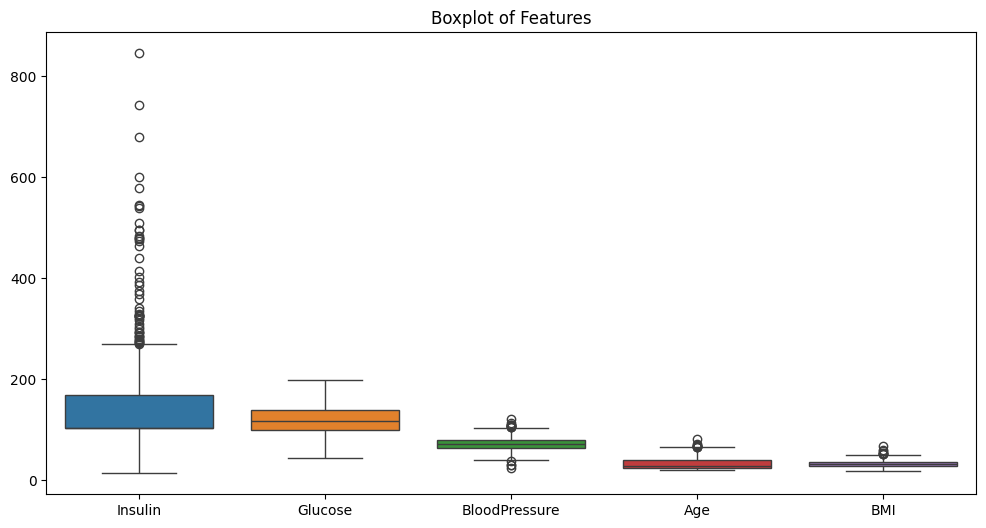

/tmp/ipython-input-2470984825.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')


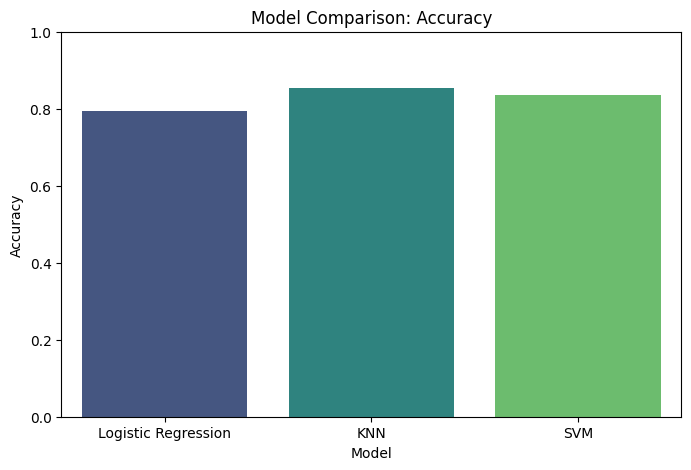

/tmp/ipython-input-2470984825.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')


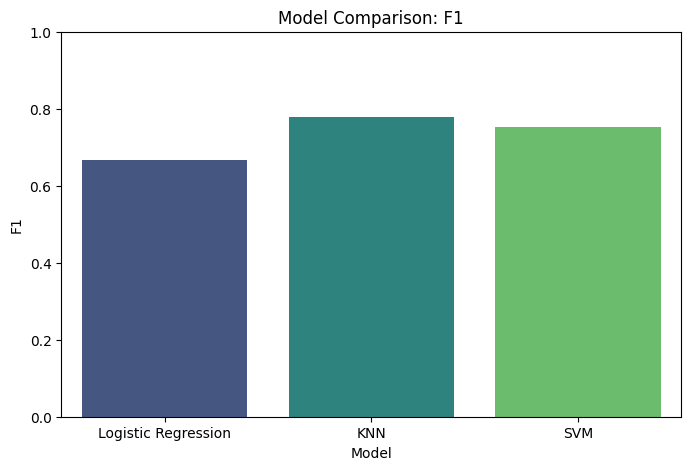

/tmp/ipython-input-2470984825.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')


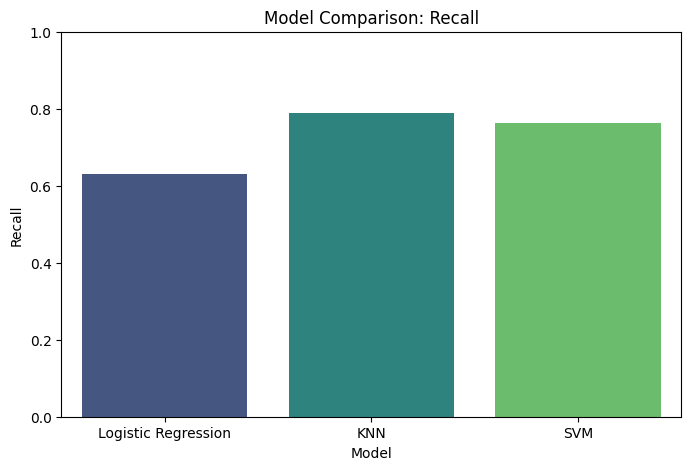

/tmp/ipython-input-2470984825.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')


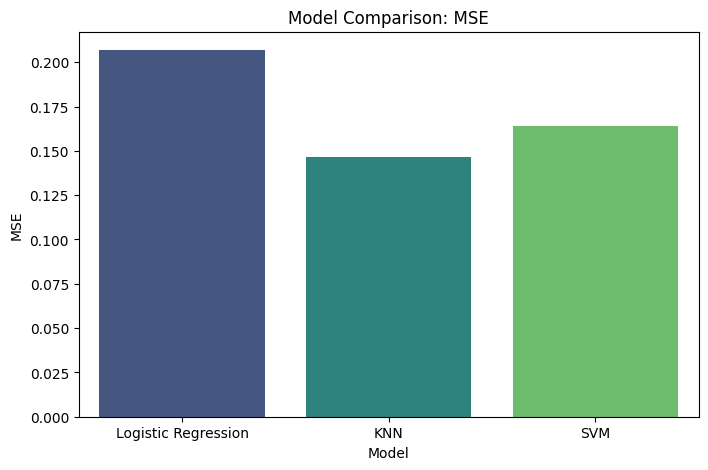

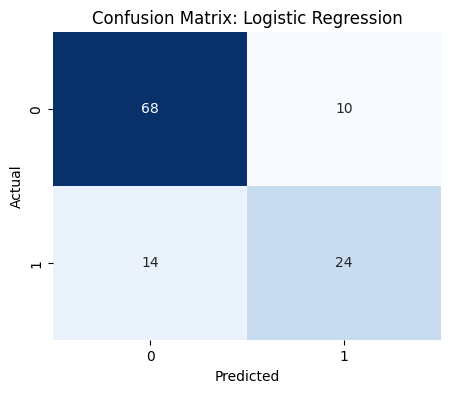

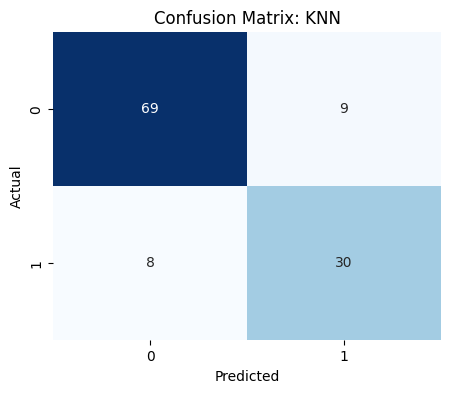

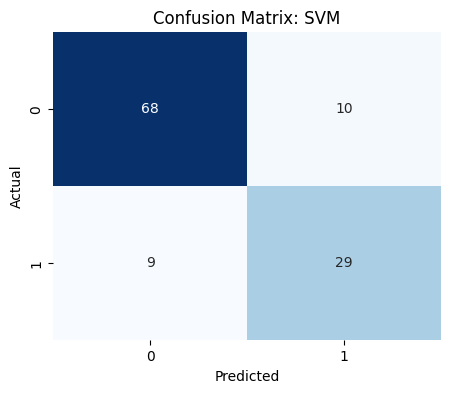

In [18]:
#GRAPHS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix, mean_squared_error, classification_report

# --- FEATURES AND TARGET ---
X = df[['Insulin','Glucose','BloodPressure','Age','BMI']]
y = df['Outcome']

# --- FEATURE SCALING ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- TRAIN-TEST SPLIT ---
xtrain, xtest, ytrain, ytest = train_test_split(X_scaled, y, test_size=0.15, random_state=0)

# --- MODELS ---
models = {
    'Logistic Regression': LogisticRegression(random_state=0),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(kernel='rbf', random_state=0)
}

# --- STORE RESULTS ---
results = {
    'Model': [],
    'Accuracy': [],
    'F1': [],
    'Recall': [],
    'MSE': [],
    'ConfMatrix': []
}

# --- TRAIN, PREDICT AND COLLECT METRICS ---
for name, model in models.items():
    model.fit(xtrain, ytrain)
    ypred = model.predict(xtest)

    results['Model'].append(name)
    results['Accuracy'].append(accuracy_score(ytest, ypred))
    results['F1'].append(f1_score(ytest, ypred))
    results['Recall'].append(recall_score(ytest, ypred))
    results['MSE'].append(mean_squared_error(ytest, ypred))
    results['ConfMatrix'].append(confusion_matrix(ytest, ypred))

    print(f"\n--- {name} ---")
    print('Accuracy:', accuracy_score(ytest, ypred))
    print('F1 Score:', f1_score(ytest, ypred))
    print('Recall:', recall_score(ytest, ypred))
    print('MSE:', mean_squared_error(ytest, ypred))
    print('Confusion Matrix:\n', confusion_matrix(ytest, ypred))
    print('Classification Report:\n', classification_report(ytest, ypred))

results_df = pd.DataFrame(results)

# --- 1. BOX PLOTS OF FEATURES ---
plt.figure(figsize=(12,6))
sns.boxplot(data=df[['Insulin','Glucose','BloodPressure','Age','BMI']])
plt.title('Boxplot of Features')
plt.show()

# --- 2. COMPARISON OF METRICS ---
metrics = ['Accuracy','F1','Recall','MSE']
for metric in metrics:
    plt.figure(figsize=(8,5))
    sns.barplot(x='Model', y=metric, data=results_df, palette='viridis')
    plt.title(f'Model Comparison: {metric}')
    plt.ylim(0,1 if metric != 'MSE' else None)
    plt.show()

# --- 3. BEAUTIFUL CONFUSION MATRIX HEATMAPS ---
for i, row in results_df.iterrows():
    plt.figure(figsize=(5,4))
    sns.heatmap(row['ConfMatrix'], annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix: {row["Model"]}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
